In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\Data Science\Rakamin\FinPro\dataset.csv')

In [3]:
kategori = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
numerikal = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',  
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues','SpecialDay']
date = ['Month']

In [4]:
df.isna().sum()

Administrative             111
Administrative_Duration    633
Informational                0
Informational_Duration       0
ProductRelated               0
ProductRelated_Duration    639
BounceRates                 74
ExitRates                    0
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems           524
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64

In [6]:
df['Administrative'] = df['Administrative'].fillna(value=df['Administrative'].median())
df['Administrative_Duration'] = df['Administrative_Duration'].fillna(value=df['Administrative_Duration'].median())
df['ProductRelated_Duration'] = df['ProductRelated_Duration'].fillna(value=df['ProductRelated_Duration'].median())
df['BounceRates'] = df['BounceRates'].fillna(value=df['BounceRates'].median())

In [7]:
df = df.dropna(subset=['OperatingSystems'])

In [8]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
df.duplicated().sum()

711

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
df.duplicated().sum()

0

In [13]:
df.keys()

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [11]:
df.Region = df.Region.astype('string').replace(['1', '2', '3', '4', '5', '6', '7', '8', '9'],
                      ['Jakarta', 'Bandung', 'Surabaya', 'Medan', 'Batam', 'Makassar', 'Tangerang', 'Yogyakarta', 'Semarang'])

df.Browser = df.Browser.replace(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'],
                                ['Safari', 'Google Chrome', 'Internet Explorer', 'Mozilla Firefox', 'Microsoft Edge', 'Samsung Internet', 'Maxthon Browser', 'Brave', 'Vivaldi', 'UC Browser', 'DuckDuckGo', 'Opera', 'Netscape Navigator'])

df.OperatingSystems = df.OperatingSystems.replace(['1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0'],
                                                  ['iOS', 'Windows', 'Android', 'MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux'])

df.TrafficType = df.TrafficType.replace(['1', '2', '3', '4', '5', '6', '8', '10', '13'],
                                        ['Organic Search', 'Paid Search', 'Direct Traffic', 'Social Media', 'Facebook Ads', 'Referral Traffic', 'Email Marketing ', 'Display Advertising', 'Affiliate Marketing'])

In [12]:
df = df.drop(df.loc[df['VisitorType'] =='Other'].index) 

In [13]:
os_replace = ['MAC OS', 'Blackberry', 'Chrome Os', 'Unix', 'Linux']
browser_replace =  ['Maxthon Browser', 'Vivaldi', 'DuckDuckGo', 'Opera', 'Netscape Navigator']
traffic_replace = ['9','7','12','14','15','16','17','18','19']

In [14]:
df['OperatingSystems'] = df['OperatingSystems'].astype('string').replace(to_replace=os_replace,value='other')
df['Browser'] = df['Browser'].astype('string').replace(to_replace=browser_replace,value='other')
df['TrafficType'] = df['TrafficType'].astype('string').replace(to_replace=traffic_replace,value='other')

C:\Users\frans\AppData\Local\Temp\ipykernel_29048\1635005748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)
C:\Users\frans\AppData\Local\Temp\ipykernel_29048\1635005748.py:6: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)
C:\Users\frans\AppData\Local\Temp\ipykernel_29048\1635005748.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)
C:\Users\frans\AppData\Local\Temp\ipykernel_29048\1635005748.py:6: UserWar

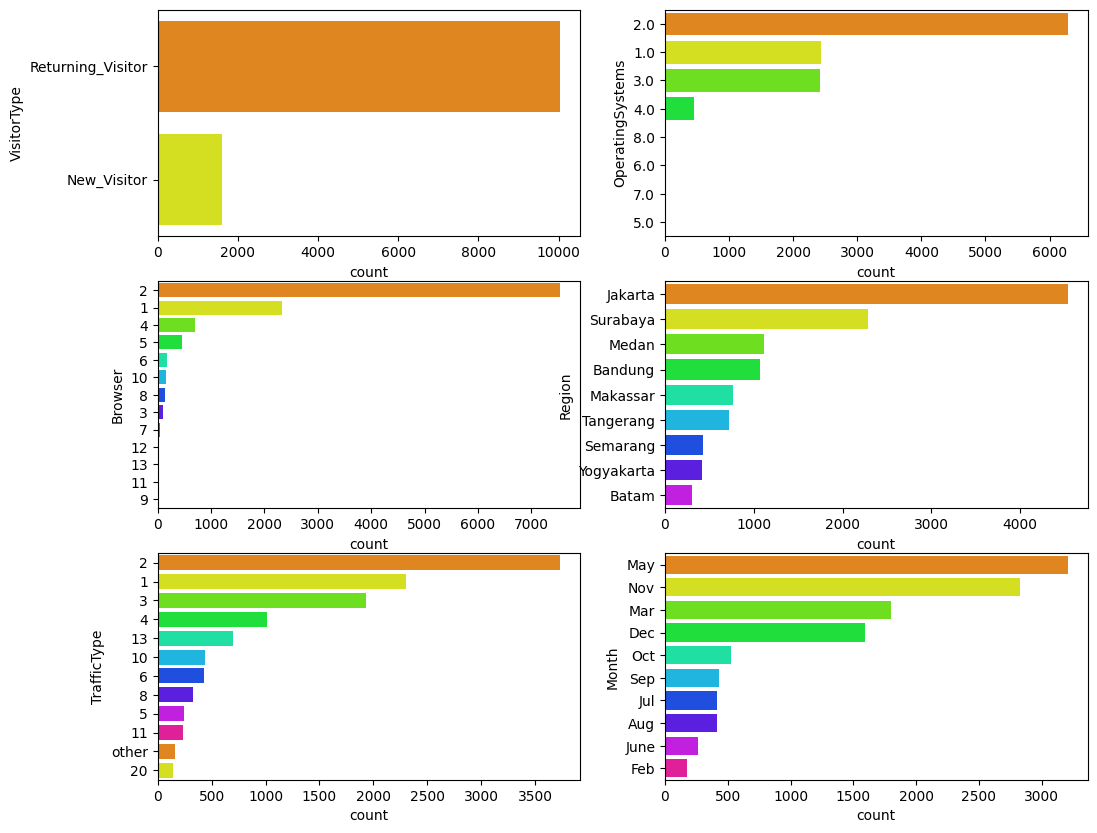

In [15]:
cat2 = ['VisitorType','OperatingSystems', 'Browser', 'Region', 'TrafficType','Month']
palette = sns.color_palette("hsv", 10)
plt.figure(figsize=(12, 10))
for i in range(0,len(cat2)):
    plt.subplot(3,2,i+1)
    sns.countplot(y=df[cat2[i]],order = df[cat2[i]].value_counts().index,palette=palette)

In [16]:
outlier = ['Administrative','Administrative_Duration','Informational','Informational_Duration',
           'ProductRelated','ProductRelated_Duration','BounceRates','ExitRates',
           'PageValues']

In [17]:
for num in df[outlier]:
    min_value = df[df[num] > 0][num].min() / 2
    df[num] = np.log(df[num] + min_value)

In [18]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col])) 
    filtered_entries = (zscore < 3) & filtered_entries
    
df_zscore = df[filtered_entries] 

print(f'Jumlah baris setelah memfilter outlier: {len(df_zscore)}')

Jumlah baris sebelum memfilter outlier: 11649
Jumlah baris setelah memfilter outlier: 10719


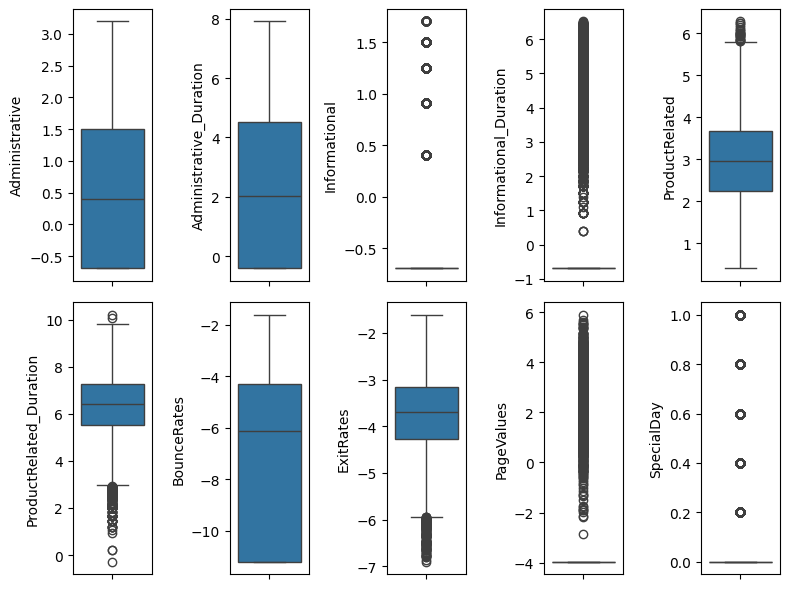

In [19]:
plt.figure(figsize=(8, 6))
for i in range(0,len(numerikal)):
    plt.subplot(2,5,i+1)
    sns.boxplot(y=df_zscore[numerikal[i]],orient='v')
    plt.tight_layout()

In [20]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend','Month']
df = pd.get_dummies(df, columns=columns_to_encode)

<span style="font-size:25px;">**Splitting Data**

In [21]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['Revenue'])
y= df['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (9319, 66)
X_test shape: (2330, 66)
y_train shape: (9319,)
y_test shape: (2330,)


<span style="font-size:25px;">**Scaling Data**

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train)  
X_test_scaled = scaler.transform(X_test) 

In [25]:
df['Revenue'].value_counts(normalize=True)* 100

Revenue
False    84.376341
True     15.623659
Name: proportion, dtype: float64

<span style="font-size:25px;">**Handling Class Imbalance**

In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

print('Original dataset shape:', Counter(y_train))
print('Resampled dataset shape:', Counter(y_res))


Original dataset shape: Counter({False: 7854, True: 1465})
Resampled dataset shape: Counter({False: 7854, True: 7854})


In [32]:
numerikal2 =  ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',  
             'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
               'SpecialDay','Revenue']


<Axes: >

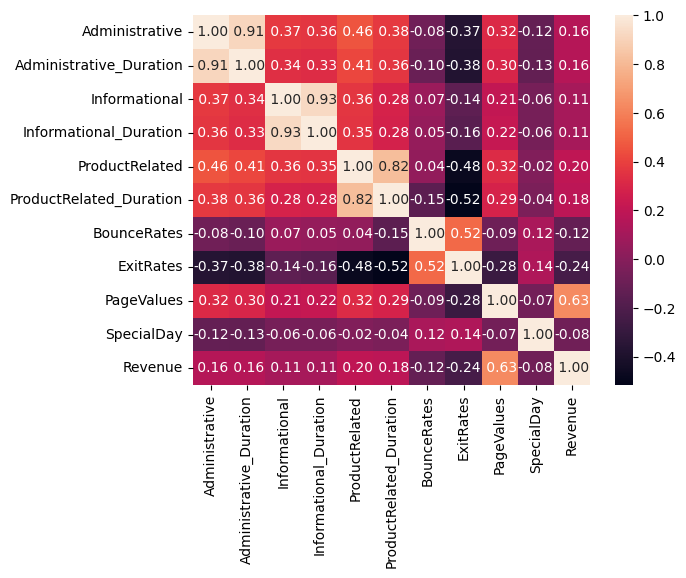

In [33]:
sns.heatmap(df[numerikal2].corr(), annot= True, fmt = ' .2f')

In [36]:
kategori_baru = ['OperatingSystems_1.0', 'OperatingSystems_2.0', 'OperatingSystems_3.0',
       'OperatingSystems_4.0', 'OperatingSystems_5.0', 'OperatingSystems_6.0',
       'OperatingSystems_7.0', 'OperatingSystems_8.0', 'Browser_1',
       'Browser_10', 'Browser_11', 'Browser_12', 'Browser_13', 'Browser_2',
       'Browser_3', 'Browser_4', 'Browser_5', 'Browser_6', 'Browser_7',
       'Browser_8', 'Browser_9', 'Region_Bandung', 'Region_Batam',
       'Region_Jakarta', 'Region_Makassar', 'Region_Medan', 'Region_Semarang',
       'Region_Surabaya', 'Region_Tangerang', 'Region_Yogyakarta',
       'TrafficType_1', 'TrafficType_10', 'TrafficType_11', 'TrafficType_13',
       'TrafficType_2', 'TrafficType_20', 'TrafficType_3', 'TrafficType_4',
       'TrafficType_5', 'TrafficType_6', 'TrafficType_8', 'TrafficType_other',
       'VisitorType_New_Visitor', 'VisitorType_Returning_Visitor',
       'Weekend_False', 'Weekend_True', 'Month_Aug', 'Month_Dec', 'Month_Feb',
       'Month_Jul', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov',
       'Month_Oct', 'Month_Sep']

In [39]:
from scipy.stats import pointbiserialr

correlation_results = {}
for column in df[kategori_baru]:
    if column != 'Revenue':  
        corr, p_value = pointbiserialr(df[column], df['Revenue'])
        correlation_results[column] = corr

for column, correlation in correlation_results.items():
    print(f"Correlation between 'Revenue' and '{column}': {correlation:.2f}")


Correlation between 'Revenue' and 'OperatingSystems_1.0': -0.01
Correlation between 'Revenue' and 'OperatingSystems_2.0': 0.07
Correlation between 'Revenue' and 'OperatingSystems_3.0': -0.07
Correlation between 'Revenue' and 'OperatingSystems_4.0': 0.01
Correlation between 'Revenue' and 'OperatingSystems_5.0': 0.00
Correlation between 'Revenue' and 'OperatingSystems_6.0': -0.00
Correlation between 'Revenue' and 'OperatingSystems_7.0': -0.00
Correlation between 'Revenue' and 'OperatingSystems_8.0': -0.01
Correlation between 'Revenue' and 'Browser_1': -0.01
Correlation between 'Revenue' and 'Browser_10': 0.02
Correlation between 'Revenue' and 'Browser_11': 0.00
Correlation between 'Revenue' and 'Browser_12': 0.01
Correlation between 'Revenue' and 'Browser_13': 0.01
Correlation between 'Revenue' and 'Browser_2': -0.00
Correlation between 'Revenue' and 'Browser_3': -0.03
Correlation between 'Revenue' and 'Browser_4': 0.02
Correlation between 'Revenue' and 'Browser_5': 0.02
Correlation betw